# Letterboxd Analysis Project: Exploration

**Author:** Sierra Stanton
***

![Cinema Amy Poehler Tina Fey](../images/amy-poehler-tina-fey-cinema.gif)

## Overview

This notebook shows an analysis of the top 4,000 users on Letterboxd and their contributed film ratings in order for us to create a recommendation system that predicts which films users will most enjoy.

## Problem

With all of the choices available to us across a myriad of sources, we need better help interpreting the signal from the noise. In this use case, we'll help film fans find their next favorite film by using an extensive database of films and ratings to better diagnose what they'll like and recommend films accordingly.

## Data Understanding

We're using data from an app called Letterboxd, which separates itself from the pack due to it's emphasis on community and social networking around film critique. In fact, this app was first recommended to me a few years back by a friend working at the British Film Institute (BFI) and who happened to have a film taste similar to mine. My experience with Letterboxd as a user made me particularly interested in the app's development and future value. They've experienced immense growth in the past few years - learn a bit more about what makes them different [here](https://www.nytimes.com/2021/01/13/movies/letterboxd-growth.html).

One of Letterboxd's main features is the ability for users to follow others and see their evaluation of a wide variety of films. However, there has yet to be a way to get personalized recommendations based on your noted film preferences. This project solves exactly that and provides a way for Letterboxd users to get a record of the films they're most likely to enjoy.

Sam Learner regularly scrapes data from Letterboxd and hosts the datasets we used on Kaggle [here](https://www.kaggle.com/samlearner/letterboxd-movie-ratings-data). Note - for our purposes, we choose not to use his included `Users` dataset.

Our two datasets are the following:
*  The Movie Data (`movie_data.csv`): this dataset gives us over 250K film's unique ID, title, and year of release.
*  The Ratings Data (`ratings_export.csv`): this dataset shows over 8M recorded ratings from a range of 1-10 that Letterboxd's top 4,000 users have submitted according to the particular film. Note that on the app itself there is a five star scale, however the 1-10 split data reflects each half star by assigning it a number (4.5 becomes 9, 5 becomes 10).

**NOTE:** Due to the lengthy size of our datasets (over 250K films, 8M film reviews), I recommend heading to the Sam's link above for download instructions and to get the very latest version of scraped data.

In [41]:
# Import standard packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import re

%matplotlib inline

### Import: Movie Data

In [7]:
# import movie_data.csv from our data folder

df_mov = pd.read_csv('../data/movie_data.csv')
display(df_mov.info())
df_mov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251066 entries, 0 to 251065
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            251066 non-null  object 
 1   image_url      233307 non-null  object 
 2   movie_id       251064 non-null  object 
 3   movie_title    249625 non-null  object 
 4   year_released  245678 non-null  float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


None

,_id,image_url,movie_id,movie_title,year_released
0,5fc85f606758f69634496fca,film-poster/5/6/9/1/4/1/569141-3am-0-230-0-345...,3am-2015,3AM,2015.0
1,5fc85f606758f69634496fd2,film-poster/4/0/0/2/1/1/400211-sensei-redensho...,sensei-redenshon,Sensei Redenshon,2013.0
2,5fc85f606758f69634496fcd,film-poster/9/3/3/1/8/93318-where-chimneys-are...,where-chimneys-are-seen,Where Chimneys Are Seen,1953.0
3,5fc85f606758f69634496fce,film-poster/4/9/5/9/0/49590-buck-rogers-0-230-...,buck-rogers,Buck Rogers,1977.0
4,5fc85f606758f69634496fd1,NaN,the-musicians-daughter,The Musician's Daughter,1911.0


### Import: Ratings Data

In [8]:
# import ratings_export.csv from our data folder

df_ratings = pd.read_csv('../data/ratings_export.csv')
display(df_ratings.info())
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566009 entries, 0 to 8566008
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 261.4+ MB


None

,_id,movie_id,rating_val,user_id
0,5fc57c5c6758f69634519395,happiest-season,8,deathproof
1,5fc57c5c6758f69634519398,mank,5,deathproof
2,5fc57c5c6758f6963451939a,ammonite,4,deathproof
3,5fc57c5c6758f69634519396,the-high-note,6,deathproof
4,5fc57c5d6758f6963451a05b,embers-2015,5,deathproof


# Data Preparation

Across both datasets, we'll first focus on cleaning them of problematic data. 

### Clean Up: Movie Data

In [9]:
# preview data

display(df_mov.info())
df_mov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251066 entries, 0 to 251065
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _id            251066 non-null  object 
 1   image_url      233307 non-null  object 
 2   movie_id       251064 non-null  object 
 3   movie_title    249625 non-null  object 
 4   year_released  245678 non-null  float64
dtypes: float64(1), object(4)
memory usage: 9.6+ MB


None

,_id,image_url,movie_id,movie_title,year_released
0,5fc85f606758f69634496fca,film-poster/5/6/9/1/4/1/569141-3am-0-230-0-345...,3am-2015,3AM,2015.0
1,5fc85f606758f69634496fd2,film-poster/4/0/0/2/1/1/400211-sensei-redensho...,sensei-redenshon,Sensei Redenshon,2013.0
2,5fc85f606758f69634496fcd,film-poster/9/3/3/1/8/93318-where-chimneys-are...,where-chimneys-are-seen,Where Chimneys Are Seen,1953.0
3,5fc85f606758f69634496fce,film-poster/4/9/5/9/0/49590-buck-rogers-0-230-...,buck-rogers,Buck Rogers,1977.0
4,5fc85f606758f69634496fd1,NaN,the-musicians-daughter,The Musician's Daughter,1911.0


In [10]:
# determine how many films we have represented

print('Number of Films: ', len(df_mov['movie_id'].unique()))

Number of Films:  251064


In [11]:
# take unique number of film identifiers, to see the difference

print('Number of Unique Titles: ', len(df_mov['movie_title'].unique()))
print('Number of Unique Movie IDs: ', len(df_mov['movie_id'].unique()))

Number of Unique Titles:  216949
Number of Unique Movie IDs:  251064


#### Column Breakdown

*  `_id`: this id is unique across rows, but does not point to anything significant.


*  `image_url`: this data should be useful when surfacing recommendations, also ensures we can distinguish films of the same title.


*  `movie_id`: this id points to each film and is unique among films with the same title


*  `movie_title`: this is a text version of the film but is not unique as there are different films with the same title, and a variety of languages present in some cases.


*  `year_released`: this shows the film's release year and sometimes outlines films yet to be released

#### Remove rows with key data missing
Since we already have over 250000 films represented, let's try only keeping the films that have full information present.

In [12]:
# check columns across movie dataframe for null values

df_mov.isna().sum()

_id                  0
image_url        17759
movie_id             2
movie_title       1441
year_released     5388
dtype: int64

In [13]:
# drop any rows that don't have associated info complete

df_mov = df_mov.dropna(how='any',
                    subset=['movie_id', 'movie_title', 'image_url', 'year_released'])

In [14]:
# check columns across movie dataframe to ensure no null values are present

df_mov.isna().sum()

_id              0
image_url        0
movie_id         0
movie_title      0
year_released    0
dtype: int64

In [15]:
# how many films do we have left

print('Number of Films: ', len(df_mov['movie_id'].unique()))

Number of Films:  230858


Let's also look deeper into info around `release year` to better understand this column and ensure there's no tricky or faulty data.

In [16]:
# ensure there's no tricky data in release year

print(df_mov.year_released.describe())
print(df_mov.year_released.sort_values(ascending=True).head())
df_mov.year_released.sort_values(ascending=True).tail()

# reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

count    230859.000000
mean       1992.907216
std          27.705089
min        1874.000000
25%        1977.000000
50%        2004.000000
75%        2015.000000
max        2028.000000
Name: year_released, dtype: float64
188032    1874.0
155385    1878.0
70572     1878.0
208301    1879.0
47833     1881.0
Name: year_released, dtype: float64


231785    2022.0
2624      2023.0
209133    2023.0
249950    2023.0
234340    2028.0
Name: year_released, dtype: float64

### Clean Up: Ratings Data

In [17]:
# preview data

display(df_ratings.head())
df_ratings.info()

,_id,movie_id,rating_val,user_id
0,5fc57c5c6758f69634519395,happiest-season,8,deathproof
1,5fc57c5c6758f69634519398,mank,5,deathproof
2,5fc57c5c6758f6963451939a,ammonite,4,deathproof
3,5fc57c5c6758f69634519396,the-high-note,6,deathproof
4,5fc57c5d6758f6963451a05b,embers-2015,5,deathproof


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8566009 entries, 0 to 8566008
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   _id         object
 1   movie_id    object
 2   rating_val  int64 
 3   user_id     object
dtypes: int64(1), object(3)
memory usage: 261.4+ MB


This df contains over 8.56M rows which is our largest out of the three datasets. This is because each user's rating across each film is represented as a disparate row. Let's see how many unique users and films are represented in this dataset.

In [18]:
# determine how many users and films we can work with that have associated ratings

print('Number of Users: ', len(df_ratings['user_id'].unique()))
print('Number of Movies: ', len(df_ratings['movie_id'].unique()))

Number of Users:  4501
Number of Movies:  251064


#### Column Breakdown

*  `_id`: this id is unique across rows, but does not point to anything significant.


*  `movie_id`: this id points to each film, is unique among films with the same title, and can therefore as a join to our movie data.


*  `rating_val`: shows each rating from 1-10 that Letterboxd's top 4,000 users have submitted according to the particular film. Note that on the app this is shown as 1-5 with half star ratings as an option, however the 1-10 split in our data reflects each half star by assigning it a number (i.e. 4.5 becomes 9, 5 becomes 10).


*  `user_id`: this shows the user attributed to each rating

#### Remove rows with key data missing

In [19]:
df_ratings.isna().sum()

_id           0
movie_id      6
rating_val    0
user_id       0
dtype: int64

If the `movie_id` value that helps us identify the name of the film is missing - I'd argue those particular rows won't be valuable to us.

In [20]:
# drop any rows that have a rating not associated with a movie_id

df_ratings = df_ratings.dropna(how='any',
                    subset=['movie_id'])

In [21]:
# ensure we no longer have any null values

df_ratings.isna().sum()

_id           0
movie_id      0
rating_val    0
user_id       0
dtype: int64

# Merge our movie data with our ratings data

Our merge column `movie_id` is consistent across both of the datasets we'll combine for use in our recommender system. Let's use this column to bring our data together and preview results.

**Note:** only the ratings data will be used when creating our recommendation model, but the movie data will prove helpful for our front end experience so we can recommend a film that Letterboxd users can quickly track down.

#### Remove unnecessary id columns across df's

Since we determined our `id` column isn't valuable across both data sets and isn't compatible upon a merge, we'll need to drop the column prior to our merge.

In [22]:
# drop _id columns across df's

df_ratings.drop(columns='_id', inplace=True)
df_mov.drop(columns='_id', inplace=True)

#### Merge both datasets according to the `movie_id`

In [23]:
# merge our movie data with our ratings data

df_mer = pd.merge(df_ratings, df_mov, on="movie_id")
df_mer.head()

,movie_id,rating_val,user_id,image_url,movie_title,year_released
0,happiest-season,8,deathproof,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
1,happiest-season,7,davidehrlich,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
2,happiest-season,4,ingridgoeswest,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
3,happiest-season,7,silentdawn,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0
4,happiest-season,2,colonelmortimer,film-poster/4/4/9/7/7/1/449771-happiest-season...,Happiest Season,2020.0


Our merge method ensured film ratings have the associated film information present and that only films with a rating reflected are included.

In [24]:
# make sure we're above board prior to our modeling

df_mer.isna().sum()

movie_id         0
rating_val       0
user_id          0
image_url        0
movie_title      0
year_released    0
dtype: int64

In [25]:
# determine how many resulting users and films we can work with that have associated ratings

print('Number of Users: ', len(df_mer['user_id'].unique()))
print('Number of Movies: ', len(df_mer['movie_id'].unique()))

Number of Users:  4501
Number of Movies:  230858


# Visualizing our Data

First, we'll create a copy of our dataframe in order to separate our work and give us room to further manipulate our data.

In [26]:
# create a copy of our merged dataframe

df_vis = df_mer.copy()

In [27]:
# supress warnings for final version of notebook

import warnings
warnings.filterwarnings('ignore')

## How do Letterboxd users typically rate films?

Let's see how ratings are distributed across our films to get a better understanding of the nature of our data and begin to infer why it might be the case.

In [28]:
df_mer['rating_val'].value_counts().sort_index()

1      140714
2      291522
3      312678
4      738008
5      862893
6     1671071
7     1559449
8     1671702
9      697803
10     582600
Name: rating_val, dtype: int64

While this is interesting, it's a bit hard to digest. Let's visualize for clarity.

In [29]:
# map our ten point scale to reflect stars in app

df_vis['stars'] = df_vis['rating_val'].map({1: 0.5, 2: 1, 3: 1.5, 4: 2, 5: 2.5, 6: 3, 7: 3.5, 8: 4, 9: 4.5, 10: 5})

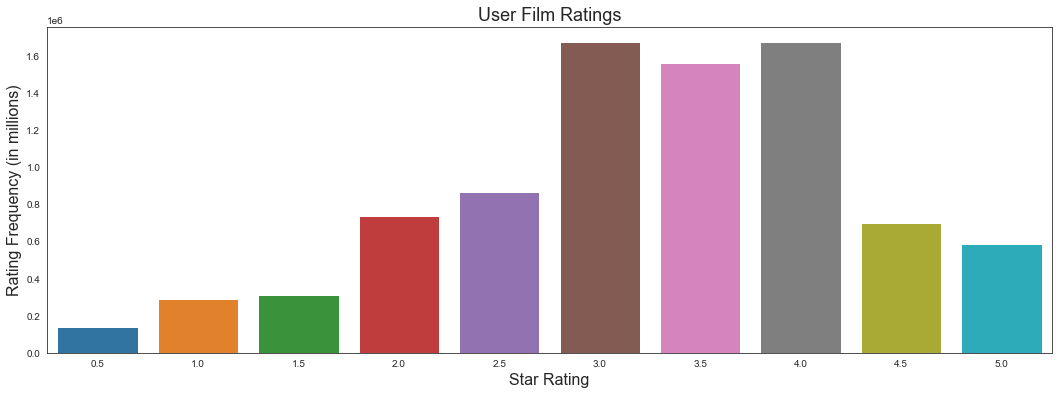

In [30]:
# set our style
sns.set_style("white")

# determine our figure size
f = plt.figure(figsize=(18, 6))

# plot and label our axes
ax = sns.countplot(data=df_vis, x=df_vis['stars'], orient="v")
ax.set_title('User Film Ratings')
kws = dict(fontsize=16, fontweight='light')
kws2 = dict(fontsize=18, fontweight='normal')
ax.set_xlabel("Star Rating", fontdict=kws)
ax.set_ylabel("Rating Frequency (in millions)", fontdict=kws)
ax.set_title('User Film Ratings', fontdict=kws2);

This is certainly more telling in a visual format. We'll make this data even clearer by giving it an order.

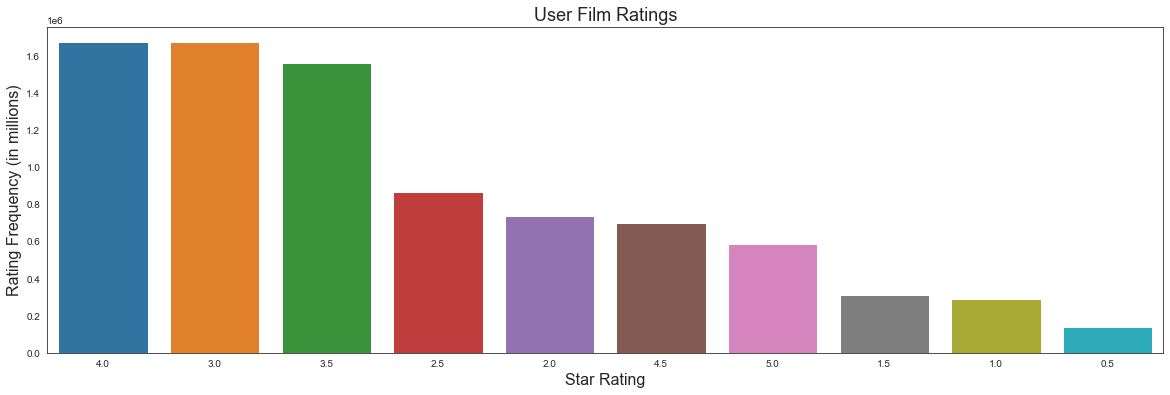

In [31]:
# visualize distribution of ratings, ordered from highest to lowest frequency

f = plt.figure(figsize=(20, 6))
ax2 = sns.countplot(data=df_vis, x=df_vis['stars'], order=df_vis['stars'].value_counts().index, orient="v")
ax2.set_xlabel("Star Rating", fontdict=kws)
ax2.set_ylabel("Rating Frequency (in millions)", fontdict=kws)
ax2.set_title("User Film Ratings", fontdict=kws2);

#sns.set_style("dark")
#ax2.set_yticklabels(ax.get_yticks(), size = 15)
#ax2.set_xticklabels(ax.get_xticks(), size = 15)
#ax2.set(xlabel='Star Rating', ylabel='Rating Frequency (in millions)')
#plt.title("User Film Ratings, in Decreasing Order");

That was helpful. Now, let's distribute these values across a five point scale like how a rating might look in the Letterboxd app.

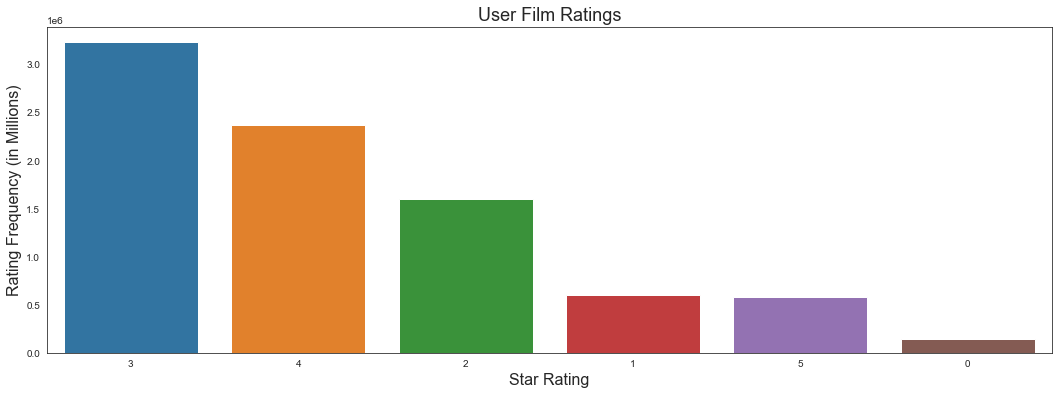

In [32]:
# map our values to a five point scale (akin to an int vs float)

df_vis['starstwo'] = df_vis['rating_val'].map({1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 3, 8: 4, 9: 4, 10: 5})

# visualize distribution of ratings, ordered from highest to lowest frequency

f = plt.figure(figsize=(18, 6))
ax3 = sns.countplot(data=df_vis, x=df_vis['starstwo'], order=df_vis['starstwo'].value_counts().index, orient="v")
ax3.set_xlabel("Star Rating", fontdict=kws)
ax3.set_ylabel("Rating Frequency (in Millions)", fontdict=kws)
ax3.set_title("User Film Ratings", fontdict=kws2);

#ax3.set_yticklabels(ax.get_yticks(), size = 15)
#ax3.set_xticklabels(ax.get_xticks(), size = 15)
#sns.set_style("dark")
#ax2.set(xlabel='Star Rating', ylabel='Rating Frequency (in millions)')
#plt.title("User Film Ratings, in Decreasing Order");

From the charts above, we can gauge quite a bit of info. First, the margins or extremes (up to 1 star, 5 stars) are the least represented. The middle holds the most weight with a noticeable skew toward the higher end (3,4,2 in decreasing order). We might infer that Letterboxd user's tend to rate films they enjoy.

Coupling this data with psycographic data around the nature of film critique/ratings and which films a user might watch or complete in order to give a review to begin with is worth exploring - especially when digging into the nature of recommendations and content discovery.

For example, it'd be interesting to dive deeper into what spurs a review - say if there's an incentive to develop authority on the app, if they're creating a catalogue of previously watched films (where favorites would be most recallable in memory), or if these film lovers tend to watch and rate films they're more likely due to enjoy because of developed and understood preferences. This would NOT eliminate the need for our recommender system, still, but instead would mean the inclusion of qualitative data pre and post deployment could prove even more valuable.

Exploring the above could make our research more interesting or influence product development in order for us to gain as close to accurate ratings as possible.

Next, further understanding which films are rated most frequently and how many ratings a Letterboxd user typically completes should prove telling.

## Which films garner the most ratings amongst Letterboxd users?

In [33]:
# see the distrubtion of ratings each film has
df_mer['movie_id'].value_counts()

get-out-2017                          3762
parasite-2019                         3761
knives-out-2019                       3628
once-upon-a-time-in-hollywood         3586
lady-bird                             3570
                                      ... 
o-guesa                                  1
40-years-of-star-trek                    1
teatro-brasileiro-origem-e-mudanca       1
frei-tito                                1
jackson-bolt                             1
Name: movie_id, Length: 230858, dtype: int64

When we take a look at which films have the most ratings represented in app - it seems that they're fairly recent. So let's investigate further and see if that's truly the case.

In [34]:
df_mer['movie_id'].value_counts().sort_index().nlargest(30)

get-out-2017                        3762
parasite-2019                       3761
knives-out-2019                     3628
once-upon-a-time-in-hollywood       3586
lady-bird                           3570
baby-driver                         3517
la-la-land                          3497
gone-girl                           3486
joker-2019                          3452
us-2019                             3443
arrival-2016                        3437
hereditary                          3422
star-wars-the-force-awakens         3421
mad-max-fury-road                   3404
spider-man-into-the-spider-verse    3404
midsommar                           3389
a-quiet-place-2018                  3371
star-wars-the-last-jedi             3365
guardians-of-the-galaxy             3342
the-shining                         3334
whiplash-2014                       3324
black-panther                       3315
the-grand-budapest-hotel            3302
dunkirk-2017                        3294
uncut-gems      

So far, I am seeing fairly recent films and one notable classic (aka films that tend to stand the test of time), The Shining.

![The Shining](../images/theshining.gif)

It's definitely worth noting if our film data is typically more recent as this would likely affect the recommendations we surface for users (i.e. the pool of films available, the accuracy of our ratings due to the data available). Let's see what our distribution is across years by grouping according to decade.

It's worth noting that if our breadth of films should be increased, that's something we could intentionally scrape from Letterboxd as well.

In [35]:
# change the format of our year_released for usability

date_idx = pd.to_datetime(df_vis.year_released.astype(int),format='%Y')
date_idx.dt.year

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
8528435    1973
8528436    2015
8528437    1975
8528438    2012
8528439    2018
Name: year_released, Length: 8528440, dtype: int64

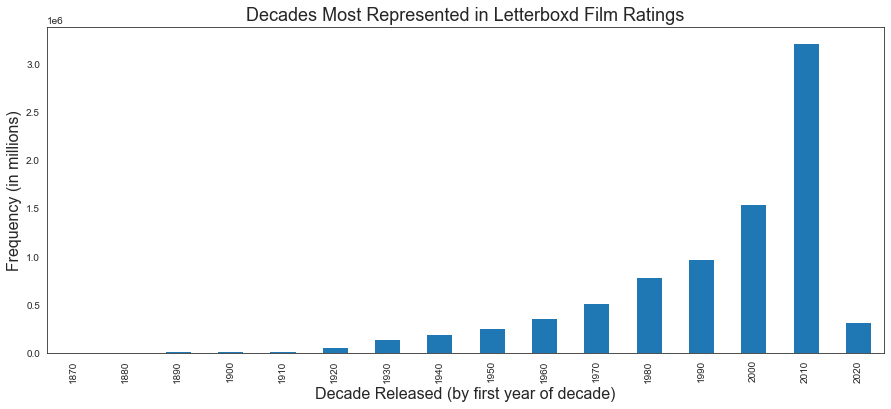

In [36]:
# declare figure size
f = plt.figure(figsize=(15, 6))

# group and plot our release year according to decade
df_vis.groupby((date_idx.dt.year // 10) * 10).count().iloc[:,0].plot(kind='bar')
plt.xlabel('Decade Released (by first year of decade)', fontdict=kws) 
plt.ylabel('Frequency (in millions)', fontdict=kws)
plt.title("Decades Most Represented in Letterboxd Film Ratings", fontdict=kws2);

# reference: https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

While Letterboxd has the functionality to pull and rate films from an extensive database (provided by TMDb The Movie Database), since it was created in 2011 - it seems like the majority of reviews might be rated upon being watched.

A review is likely to be more accurate when being rated in real time - which could increase the quality of our ratings, however we don't want to only pull recs from recent years or only have greater prediction accuracy within a certain time frame. This might come into play when deploying our app and choose how to cluster and render recs, how we assess qualitative feedback, and it might mean we can strengthen the performance of our model itself by scraping more data from Letterboxd or a trusted source.

This also perhaps begs deeper questions around the nature of Letterboxd and the ability to follow media and companies in app. If recently released films can incentivize folks to rate the film (whether directly or indirectly via a media partnership with a trusted media co like Indiewire - who could then post to Letterboxd and bring film awareness) - then how might our data be skewed. This also makes me further question our user data itself and if there could be any entities separate from individuals present. While user category data isn't part of what we have access to - perhaps seeing a stat like the quantity of ratings can help us better understand the nature of our users.

Separate from this project, if I were working with Letterboxd, this would be interesting to explore with team interviews and by diving deeper into top-users themselves and their qualififcations/related-criteria. Since they started in beta and are known for a degree of bootstrapping via patrons and the like, the app culture would likely lend itself in our favor.

## How many films do our users typically rate?

The scraped data we obtained specifically lists these folks as representative of the very "top" Letterboxd users. Let's start to understand why this might be the case and see if our stats shed light on our user profiles by getting a better understanding of **how many films the top Letterboxd users rate**.

This should help us better gauge what dictates a user is considered "top" or a "film lover" from the social networking app. We also might be able to better understand how user similarities might be created or dissected later during our modeling phase.

In [37]:
# see the range of reviews users have completed

df_vis['user_id'].value_counts()

acervofilmico      73993
ghettominibar      24388
punq               23828
loureviews         22202
thecinema4pylon    20371
                   ...  
brunadnts              1
scottnye               1
john209                1
twodark                1
drewmcweeny            1
Name: user_id, Length: 4501, dtype: int64

Let's visualize this for clarity and appropriate grouping.

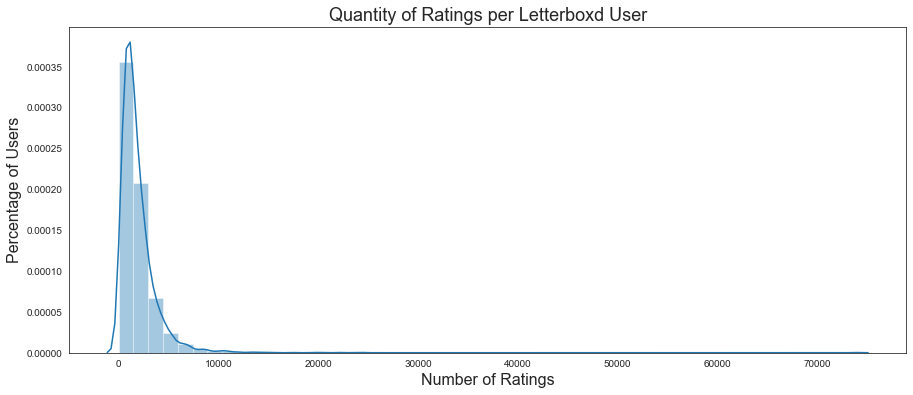

In [43]:
# see the full distribution of user film reviews

# declare figure size
f = plt.figure(figsize=(15, 6))

# plot the count of ratings per user
df_qtyratings = df_vis['user_id'].value_counts()
x = pd.Series(df_qtyratings, name="Number of Film Reviews")
ax = sns.distplot(x)
#ax.yaxis.set_major_formatter(FormatStrFormatter("%.5f"))
ax.set_xlabel("Number of Ratings", fontdict=kws)
ax.set_ylabel("Percentage of Users", fontdict=kws)
ax.set_title("Quantity of Ratings per Letterboxd User", fontdict=kws2);

# reference: https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

There are clearly users far from the norm and the majority lie between 1 to 10K. Let's zoom in for a better look at the normal distribution of ratings per user.

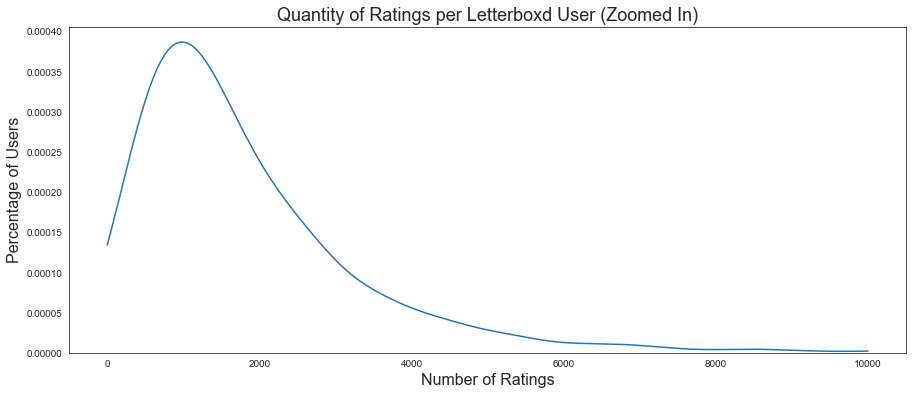

In [44]:
# zero in on our distribution to better understand the typical amount of user reviews

# declare figure size
f = plt.figure(figsize=(15, 6))

# plot the count of ratings per user, with a limited view
ax = sns.distplot(x, hist=False, kde_kws={'clip': (0.0, 10000.00)})
#ax.axvline(df_vis['user_id'].value_counts().mean(),color='k', ls=':',
 #           label=f"Mean Reviews={df_vis['user_id'].value_counts.mean()}")
ax.set_xlabel("Number of Ratings", fontdict=kws)
ax.set_ylabel("Percentage of Users", fontdict=kws)
ax.set_title("Quantity of Ratings per Letterboxd User (Zoomed In)", fontdict=kws2);

This was certainly telling. There are a moderate amount of folks on the margins (i.e. 1 review vs 70K is a stark example) but the mean amount of reviews per user in our dataset is X. With more time, we might want to narrow down our users to one's that seem feasible for an individual profile and toward users that are more active so we can better cluster user similarities for accuracy and learnings.

## Ensure our merged dataset is ready for our recommendation system

In our next notebook, we'll use the surprise library to bring both K-Nearest Neighbor (KNN) and Standard (SVD) model approaches to our dataset.

Surprise, a loose abbreviation for Simple Python RecommendatIon System Engine, requires the following columns: user, items, ratings

We'll need to modify our merged set to ensure only the following columns of data are present: `user_id`, `movie_id`, and `rating_id`. Note, we don't use `movie_title` because even though it signifies the film in question - there are duplicate titles within this column even though the `movie_id` is indeed distinct. We noted this while cleaning our iniitla datasets.

In [35]:
# create df ready for model-based approach
df = df_mer.copy()
df.drop(columns=['image_url', 'movie_title', 'year_released'], inplace=True)

In [36]:
df.head()

,movie_id,rating_val,user_id
0,happiest-season,8,deathproof
1,happiest-season,7,davidehrlich
2,happiest-season,4,ingridgoeswest
3,happiest-season,7,silentdawn
4,happiest-season,2,colonelmortimer


Now, we're ready to start modeling in order to predict the best film recommendations. Let's ensure we can bring our resulting dataframe into our [modeling notebook](notebooks/notebooks/modeling.ipynb)

In [37]:
# pickle for saving df's for use across notebooks
import pickle
pickle.dump(df,open("df.pkl", "wb"))